In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle #me permite guardar objetos de python
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#import lightgbm as lgb
#from catboost import CatBoostClassifier librerias que toman datos numericos y categoricos. 
from sklearn.ensemble import RandomForestClassifier


### Paso 1: Carga del conjunto de datos.

Importamos nuestros datos de EDA previo, para comenzar el análisis del ejercicio aplicando el modelo árbol de decisión.

In [178]:
df =  pd.read_csv('/workspaces/Antonio27M-machine-learning/data/processed/eda_insulina.csv')

In [179]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [180]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,0.2,0.0,0.304,21
618,9,112,82,24.000000,0.2,28.2,1.282,50
346,1,139,46,19.000000,83.0,28.7,0.654,22
294,0,161,50,20.536458,0.2,21.9,0.254,65
231,6,134,80,37.000000,370.0,46.2,0.238,46


In [181]:
y_train.head()

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

### Paso 2: Construye un random forest.

In [182]:
model = DecisionTreeClassifier(random_state=18)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [183]:
model.score(X_train, y_train)

1.0

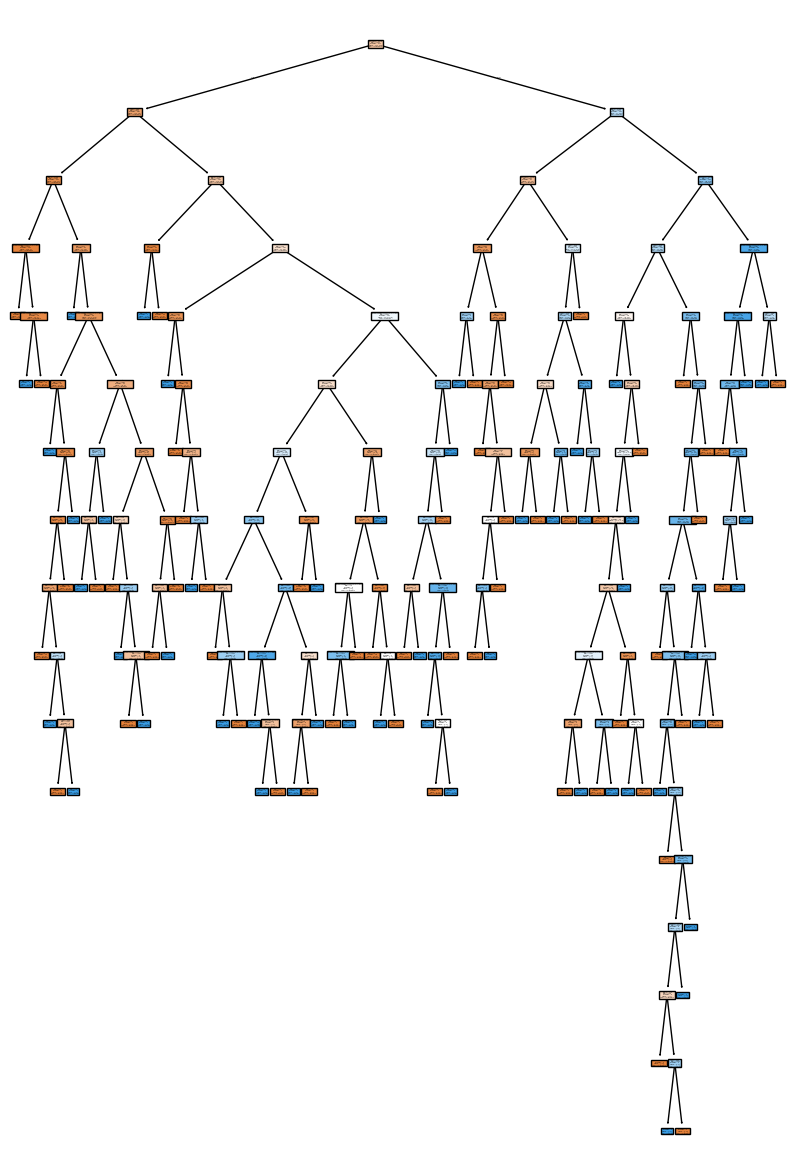

In [184]:
fig = plt.figure(figsize=(10,15))
tree.plot_tree(model, feature_names=list(X_train.columns), class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

### Observaciones:

Se realiza un gráfico para observar los diferentes niveles dentro de nuestro modelo, visualizando más de 12 niveles. 

In [185]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [186]:
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7337662337662337,
 0.6129032258064516,
 0.6909090909090909,
 0.6495726495726496)

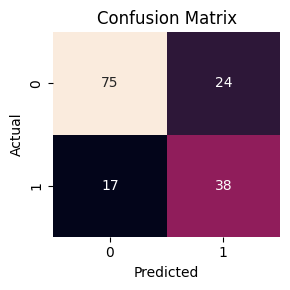

In [187]:
df_confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(df_confusion)
plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Observaciones: 

Resultado original sin alteraciones en los parámetros con un porcentaje 77%.

In [188]:
model_uno = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=120, random_state=18, class_weight="balanced")
model_uno.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'random'
,max_depth,120
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [189]:
y_pred_uno = model_uno.predict(X_test)
y_pred_uno

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [190]:
accuracy_score(y_test, y_pred_uno), precision_score(y_test, y_pred_uno), recall_score(y_test, y_pred_uno), f1_score(y_test, y_pred_uno)

(0.6948051948051948, 0.5689655172413793, 0.6, 0.584070796460177)

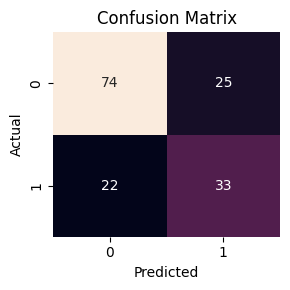

In [191]:
df_confusion = confusion_matrix(y_test, y_pred_uno)
df_cm = pd.DataFrame(df_confusion)
plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Observaciones: 

Resultado segundario realizando hiperparametrización con diferentes resultados, tomando el resultado más elevado con un porcentaje 72%. (Manual)

In [192]:
model_arbol = RandomForestClassifier(random_state = 18)
model_arbol.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


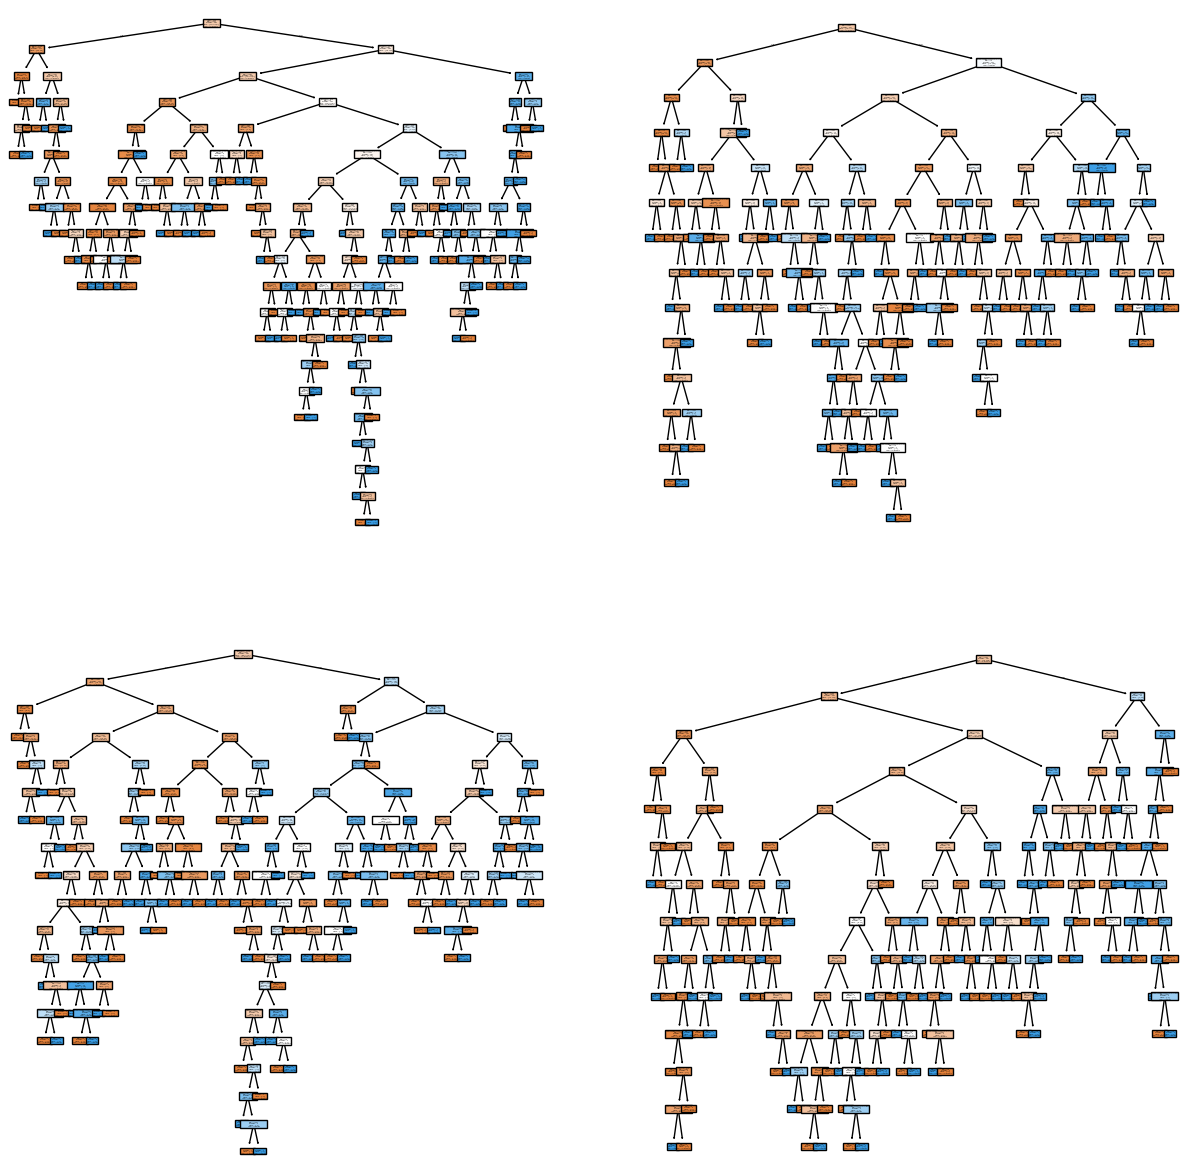

In [193]:
fig, axis = plt.subplots(2, 2, figsize=(15, 15))
tree.plot_tree(model_arbol.estimators_[0], ax=axis[0, 0], feature_names=list(X_train.columns), class_names=["No Diabetes", "Diabetes"], filled=True)
tree.plot_tree(model_arbol.estimators_[1], ax=axis[0, 1], feature_names=list(X_train.columns), class_names=["No Diabetes", "Diabetes"], filled=True)
tree.plot_tree(model_arbol.estimators_[2], ax=axis[1, 0], feature_names=list(X_train.columns), class_names=["No Diabetes", "Diabetes"], filled=True)
tree.plot_tree(model_arbol.estimators_[3], ax=axis[1, 1], feature_names=list(X_train.columns), class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

In [194]:
y_pred_test = model_arbol.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [195]:
accuracy_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), recall_score(y_test, y_pred_test), f1_score(y_test, y_pred_test)

(0.7597402597402597,
 0.6666666666666666,
 0.6545454545454545,
 0.6605504587155964)

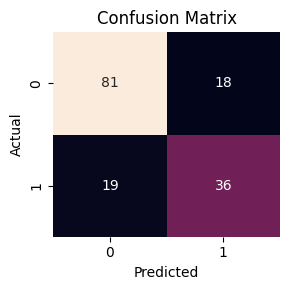

In [196]:
df_confusion = confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(df_confusion)
plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [197]:
param_grid = {'n_estimators':[20, 50, 100],'max_depth': [3, 5, 10],'criterion':['gini', 'entropy'],'max_features': ['sqrt', 'log2', None],
                   'min_samples_split': [10, 20, 50], 'min_samples_leaf': [1, 2, 4]}

In [ ]:
grid_search_arbol = GridSearchCV(RandomForestClassifier(random_state=18),
                                param_grid,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=1)

grid_search_arbol.fit(X_train, y_train)

grid_search_arbol.best_params_

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [ ]:
y_pred_test_grid = grid_search_arbol.best_estimator_.predict(X_test)
y_pred_test_grid

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
accuracy_score(y_test, y_pred_test_grid), precision_score(y_test, y_pred_test_grid), recall_score(y_test, y_pred_test_grid), f1_score(y_test, y_pred_test_grid)

(0.7597402597402597,
 0.6666666666666666,
 0.6545454545454545,
 0.6605504587155964)

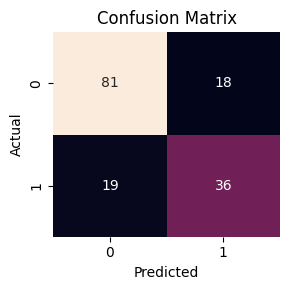

In [ ]:
df_confusion = confusion_matrix(y_test, y_pred_test_grid)
df_cm = pd.DataFrame(df_confusion)
plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Paso 3: Guarda el modelo

In [ ]:
with open('/workspaces/Antonio27M-machine-learning/models/modelo-random.pkl', 'wb') as file:
    pickle.dump(grid_search_arbol.best_estimator_, file)

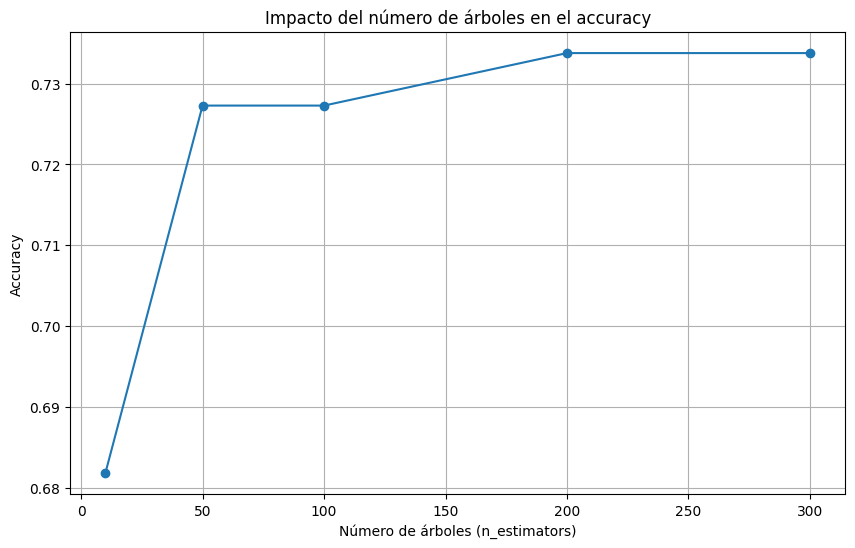

In [ ]:
n_trees = [10, 50, 100, 200, 300]
accuracies = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=18)
    rf.fit(X_train, y_train)
    accuracies.append(rf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_trees, accuracies, marker='o')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Impacto del número de árboles en el accuracy')
plt.grid(True)
plt.show()

### Conclusiones: 

Tomando en consideración en los diferentes análisis el primero tiene unas métricas más aceptables de todos, el modelo predice los no diabéticos, detecta diabéticos pero no todos. 

Analizando el gráfico final de n_estimators y accuracy; podemos concluir que el modelo se estanca a partir n_estimators = 100.